In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[100]

In [6]:
single_image.shape

(28, 28)

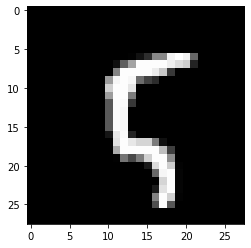

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

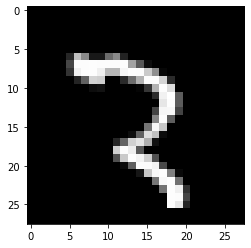

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [21]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
__________________________________________________

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [24]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 41s 43ms/step - loss: 0.2446 - accuracy: 0.9287 - val_loss: 0.0947 - val_accuracy: 0.9718
Epoch 2/5
938/938 [==============================] - 33s 36ms/step - loss: 0.0810 - accuracy: 0.9760 - val_loss: 0.0666 - val_accuracy: 0.9780
Epoch 3/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0571 - accuracy: 0.9828 - val_loss: 0.0624 - val_accuracy: 0.9785
Epoch 4/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0455 - accuracy: 0.9860 - val_loss: 0.0477 - val_accuracy: 0.9833
Epoch 5/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0367 - accuracy: 0.9892 - val_loss: 0.0547 - val_accuracy: 0.9807


In [25]:
metrics = pd.DataFrame(model.history.history)

In [26]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.244634,0.928750,0.094735,0.9718
1,0.081042,0.976017,0.066561,0.9780
2,0.057146,0.982800,0.062406,0.9785
3,0.045466,0.986033,0.047652,0.9833
4,0.036679,0.989217,0.054730,0.9807


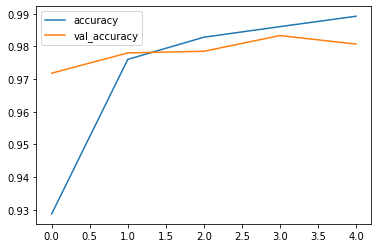

In [27]:
metrics[['accuracy','val_accuracy']].plot()

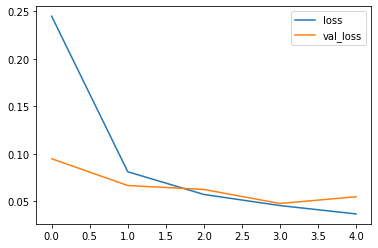

In [28]:
metrics[['loss','val_loss']].plot()

In [29]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

In [30]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 978    0    0    1    0    0    1    0    0    0]
 [   0 1130    2    0    0    0    2    0    1    0]
 [   6    6  999    2    3    0    2    7    6    1]
 [   0    0    0  999    0    4    0    3    4    0]
 [   3    0    0    0  968    0    2    0    3    6]
 [   5    0    1   13    0  858    8    0    7    0]
 [   9    3    0    0    1    4  939    1    1    0]
 [   2    1    9    4    1    0    0 1007    3    1]
 [  10    0    1    1    2    2    1    2  953    2]
 [   6    4    1    2    4    2    0    9    5  976]]


In [31]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Prediction for a single input**



In [42]:
img = image.load_img('eight.png')

In [43]:
type(img)

PIL.Image.Image

In [44]:
img = image.load_img('eight.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [45]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

In [46]:
print(x_single_prediction)

[6]


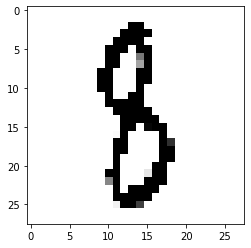

In [47]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [48]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


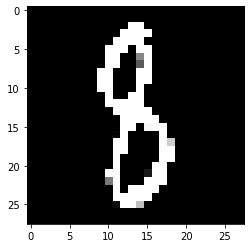

In [49]:
plt.imshow(img_28_gray_inverted_scaled.reshape(28,28),cmap='gray')

In [50]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

In [51]:
print(x_single_prediction)

[8]
